Bacis Ensemble Technique

Dataset : Breast Cancer Dataset

Models : Decision Tree Classifier, K NN (5) Classifier, Logistic Regression 

Techniques Used: 
        1. Voting <br>
        2. Weightage Voting<br>
        3. Average<br>
        4. Weightage Average

In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
dataset=load_breast_cancer()

In [2]:
print(dataset.DESCR)
print(dataset.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
import numpy as np
X=np.asarray(dataset.data)
Y=np.asarray(dataset.target)


In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [5]:
from sklearn import tree
decision_tree=tree.DecisionTreeClassifier()
decision_tree=decision_tree.fit(X_train,Y_train)


In [6]:
#tree.plot_tree(decision_tree)
import graphviz 


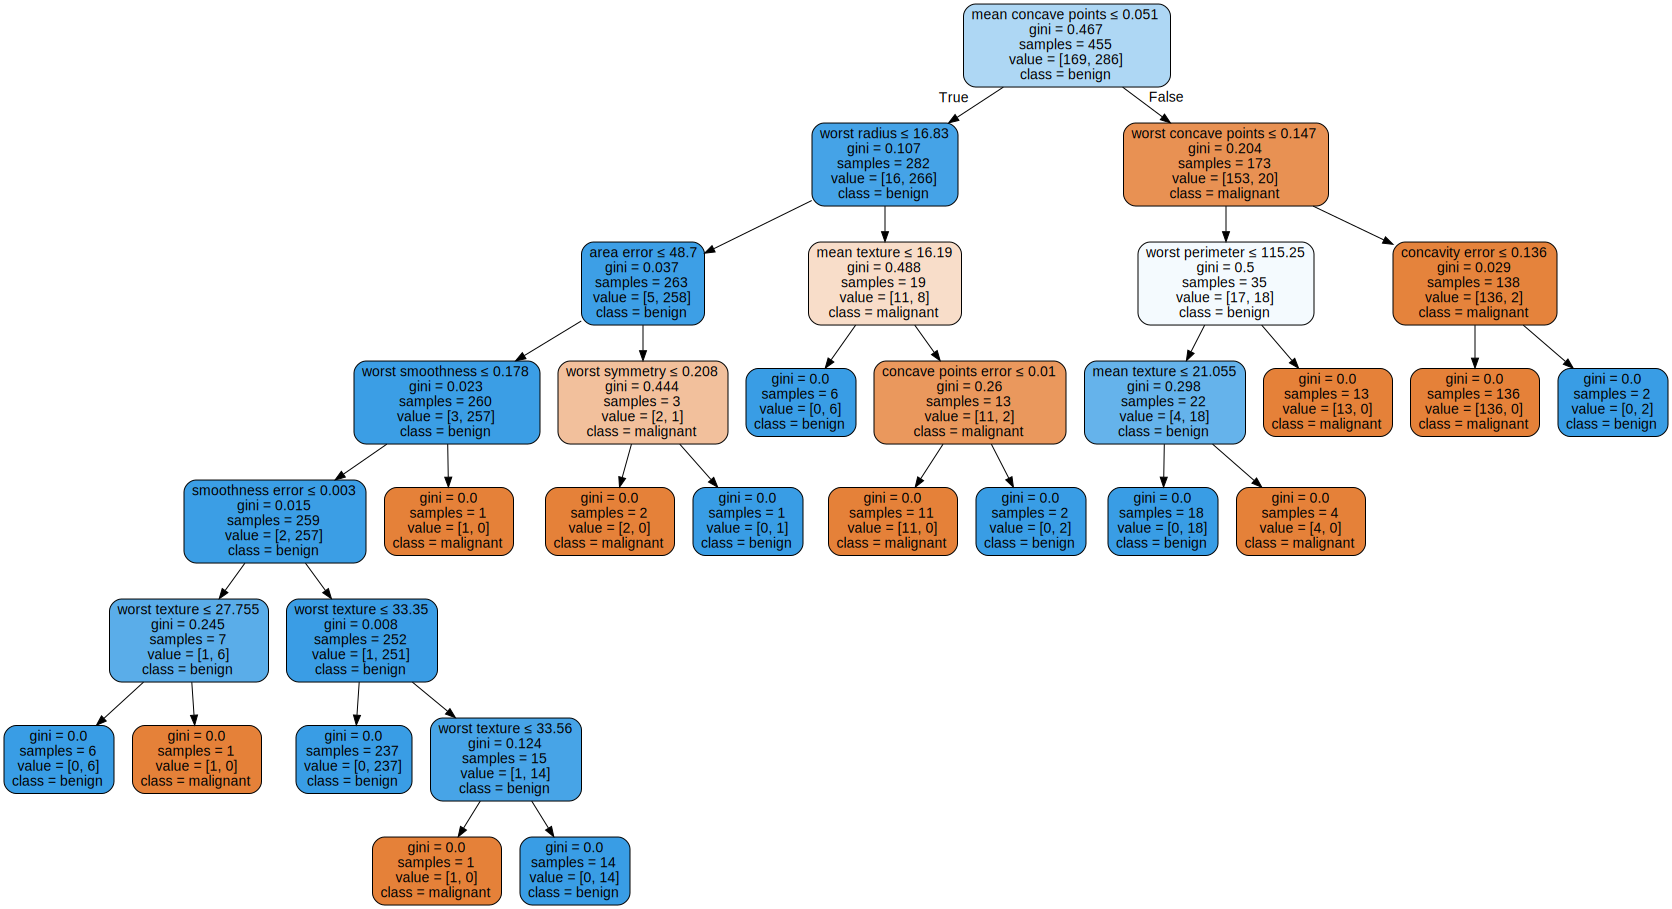

In [7]:
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
...                      feature_names=dataset.feature_names,  
...                      class_names=dataset.target_names,  
...                      filled=True, rounded=True,  
...                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
 grap=neigh.kneighbors_graph(X_train)
 grap=grap.toarray()
 grap

array([[1., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=50)
clf=clf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
pred_decision_tree=decision_tree.predict(X_test)
pred_neigh=neigh.predict(X_test)
pred_clf=clf.predict(X_test)

# can do mannually by finding mode also
!pip install statistics --quiet
import statistics

majority=[]
for i in range(len(X_test)):
    majority.append(statistics.mode([pred_decision_tree[i],pred_neigh[i],pred_clf[i]]))


In [12]:
from sklearn.ensemble import  VotingClassifier
#here u can assign weight to the 
mojority_vote = VotingClassifier(estimators=[
                                    ('lr', clf), ('dt',decision_tree), ('k-5', neigh)],
                                     voting='hard',weights=None)

mojority_vote.fit(X_train,Y_train)                                 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                               

In [13]:
mojority_vote_weight = VotingClassifier(estimators=[
                                    ('lr', clf), ('dt',decision_tree), ('k-5', neigh)],
                                     voting='hard',weights=[1,0.2,-.5])

mojority_vote_weight.fit(X_train,Y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=50,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                               

In [14]:
#average 
pred_decision_tree_prob=decision_tree.predict_proba(X_test)
pred_neigh_prob=neigh.predict_proba(X_test)
pred_clf_prob=clf.predict_proba(X_test)

average_prediction=(pred_decision_tree_prob+pred_neigh_prob+pred_clf_prob)/3.

In [15]:
#weightage average voting
pred_decision_tree_prob=decision_tree.predict_proba(X_test)
pred_neigh_prob=neigh.predict_proba(X_test)
pred_clf_prob=clf.predict_proba(X_test)

decision_wt=2
neigh_wt=0.2
logistic_weight=1

average_prediction=(pred_decision_tree_prob*decision_wt+pred_neigh_prob*pred_neigh_prob+pred_clf_prob*logistic_weight)/3.